# Visualize 3D trajectory of inner droplets

## 0 Rotation view

Show the outer droplet as dashed frames, and the inner droplet as solid circle. The trajectory is visualized a as dot dashed line. 

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from myImageLib import bestcolor
from IPython.display import clear_output
from openpiv.smoothn import smoothn
from scipy.signal import medfilt2d

In [8]:
folder = r"C:\Users\liuzy\Documents\nov16\extract\0003_2021-11-16"
traj = pd.read_csv(os.path.join(folder, "Track.txt"), usecols=[0,1,2,3], names=["frame", "x", "y", "z"], sep="\t")
r = 490 * 0.1 / 2 # Radius of outer droplet
a = 0; b = 0; c = 0; # Center coordinates of 

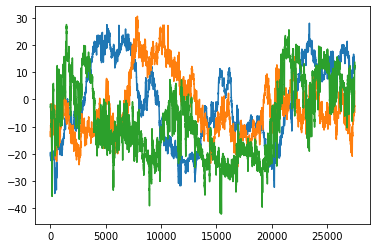

In [10]:
plt.plot(traj.x)
plt.plot(traj.y)
plt.plot(traj.z)

In [53]:
save_folder = os.path.join(folder, '3d-traj-RotView')
if os.path.exists(save_folder) == False:
    os.makedirs(save_folder)
for n, i in traj.iterrows():
    if n % 100 == 0:
        print('{0:d}/{1:d}, {2:.2f}%'.format(n, len(traj), n/len(traj)*100), end="\r")
        fig = plt.figure(figsize=(3, 3), dpi=300)
        ax = fig.add_subplot(111, projection='3d')
        ax.set_xlim([a-r, a+r])
        ax.set_ylim([b+r, b-r])
        ax.set_zlim([c-r, c+r])
        u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
        x = r*np.cos(u)*np.sin(v) + a
        y = r*np.sin(u)*np.sin(v) + b
        z = r*np.cos(v) + c
        ax.plot_wireframe(x, y, z, color=(1, 0, 0, 0.3), lw=0.5, ls='--')
        ax.axis('off')
        ax.plot(traj.x[:n], traj.y[:n], traj.z[:n], color='black', lw=0.5, ls='-.')
        ax.scatter(traj.x[n], traj.y[n], traj.z[n], s=20, marker='o', color=bestcolor(1))
        ax.view_init(30, 360*n/len(traj))
        fig.savefig(os.path.join(save_folder, '{:04d}.jpg'.format(n)))
        plt.close("all")
#         clear_output(wait=True)